Size of array is 1000
Time taken using Merge Sort is 0.014873981475830078
Time taken using Quick Sort is 0.0037381649017333984

Size of array is 2000
Time taken using Merge Sort is 0.020478487014770508
Time taken using Quick Sort is 0.021363496780395508

Size of array is 4000
Time taken using Merge Sort is 0.0284576416015625
Time taken using Quick Sort is 0.018611669540405273

Size of array is 8000
Time taken using Merge Sort is 0.15288281440734863
Time taken using Quick Sort is 0.10181260108947754



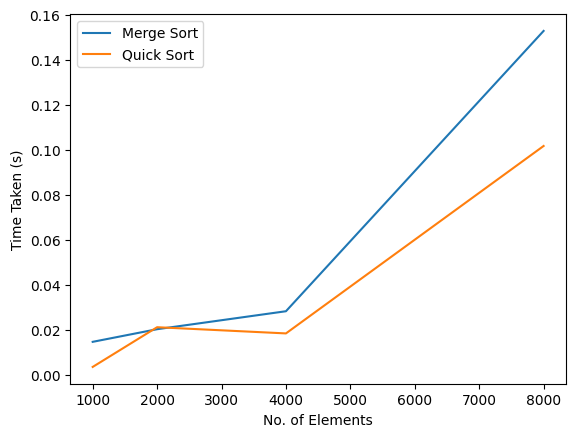

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np

time_taken_merge = []
time_taken_quick = []
no_of_elem = []


def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)


def merge(left, right):
    merged = []
    i = 0
    j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    while i < len(left):
        merged.append(left[i])
        i += 1

    while j < len(right):
        merged.append(right[j])
        j += 1

    return merged


def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[0]
    less = [x for x in arr[1:] if x <= pivot]
    greater = [x for x in arr[1:] if x > pivot]

    return quick_sort(less) + [pivot] + quick_sort(greater)


arr = np.random.randint(0, 1000, 1000)

for i in range(4):
    print("Size of array is", arr.size)
    # Merge Sort
    x = arr.copy()
    start = time.time()
    merge_sort(x)
    time_taken_merge.append(time.time() - start)
    print("Time taken using Merge Sort is", time_taken_merge[i])
    # Quick Sort
    y = arr.copy()
    start = time.time()
    quick_sort(y)
    time_taken_quick.append(time.time() - start)
    no_of_elem.append(len(arr))
    print("Time taken using Quick Sort is", time_taken_quick[i], end='\n\n')
    if i == 6:
        break
    arr = np.append(arr, arr[-1] + arr)

plt.plot(no_of_elem, time_taken_merge, label='Merge Sort')
plt.plot(no_of_elem, time_taken_quick, label='Quick Sort')
plt.xlabel('No. of Elements')
plt.ylabel('Time Taken (s)')
plt.legend()
plt.show()
